In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
table_1 = pd.read_excel("/Users/umair/Downloads/projects/project_1/data/raw/monthly-births-june-2025.xlsx", sheet_name="Table_1")
table_2 = pd.read_excel("/Users/umair/Downloads/projects/project_1/data/raw/monthly-births-june-2025.xlsx", sheet_name="Table_2")


In [4]:
table_1.head(5)

,Year,Month,NHS Board area,Births registered
0,2025,June,Ayrshire and Arran,273
1,2025,June,Borders,64
2,2025,June,Dumfries and Galloway,82
3,2025,June,Fife,242
4,2025,June,Forth Valley,195


In [5]:
table_2.head(5)

,Year,Month,Local Authority,Births registered
0,2025,June,Aberdeen City,136
1,2025,June,Aberdeenshire,160
2,2025,June,Angus,70
3,2025,June,Argyll and Bute,43
4,2025,June,City of Edinburgh,365


In [6]:
# Rename columns to have a common key for merging
table_1_renamed = table_1.rename(columns={"NHS Board area": "register_by"})
table_2_renamed = table_2.rename(columns={"Local Authority": "register_by"})

# Merge on Year, Month, and Area
merged = pd.merge(
    table_1_renamed,
    table_2_renamed,
    on=["Year", "Month", "register_by"],
    how="outer",
    suffixes=('_t1', '_t2')
)

# Fill NaN with 0 for births registered columns
merged['Births registered_t1'] = merged['Births registered_t1'].fillna(0)
merged['Births registered_t2'] = merged['Births registered_t2'].fillna(0)

# Sum births from both tables
merged['Births registered total'] = merged['Births registered_t1'] + merged['Births registered_t2']

# Show result
data = merged[['Year', 'Month', 'register_by', 'Births registered total']]

In [7]:
data.head(20)

,Year,Month,register_by,Births registered total
0,1991,August,Ayrshire and Arran,427.0
1,1991,August,Borders,100.0
2,1991,August,Dumfries and Galloway,163.0
3,1991,August,Fife,386.0
4,1991,August,Forth Valley,300.0
5,1991,August,Grampian,586.0
6,1991,August,Greater Glasgow and Clyde,1375.0
7,1991,August,Highland,304.0
8,1991,August,Lanarkshire,707.0
9,1991,August,Lothian,918.0


In [8]:
data.tail(20)

,Year,Month,register_by,Births registered total
15753,2025,May,Midlothian,85.0
15754,2025,May,Moray,78.0
15755,2025,May,Na h-Eileanan Siar,17.0
15756,2025,May,North Ayrshire,84.0
15757,2025,May,North Lanarkshire,229.0
15758,2025,May,Orkney,13.0
15759,2025,May,Orkney Islands,13.0
15760,2025,May,Perth and Kinross,96.0
15761,2025,May,Renfrewshire,118.0
15762,2025,May,Scotland,7202.0


In [9]:
# Display the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15773 entries, 0 to 15772
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15773 non-null  int64  
 1   Month                    15773 non-null  object 
 2   register_by              15773 non-null  object 
 3   Births registered total  15773 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 493.0+ KB


In [10]:
# overview of the data
data['Births registered total'].describe()

count    15773.000000
mean       426.270082
std       1331.626786
min          1.000000
25%         69.000000
50%        118.000000
75%        322.000000
max      18466.000000
Name: Births registered total, dtype: float64

/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_56723/1574135371.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='register_by', y='Births registered total', data=data, ci=None, palette='tab20')
/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_56723/1574135371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='register_by', y='Births registered total', data=data, ci=None, palette='tab20')


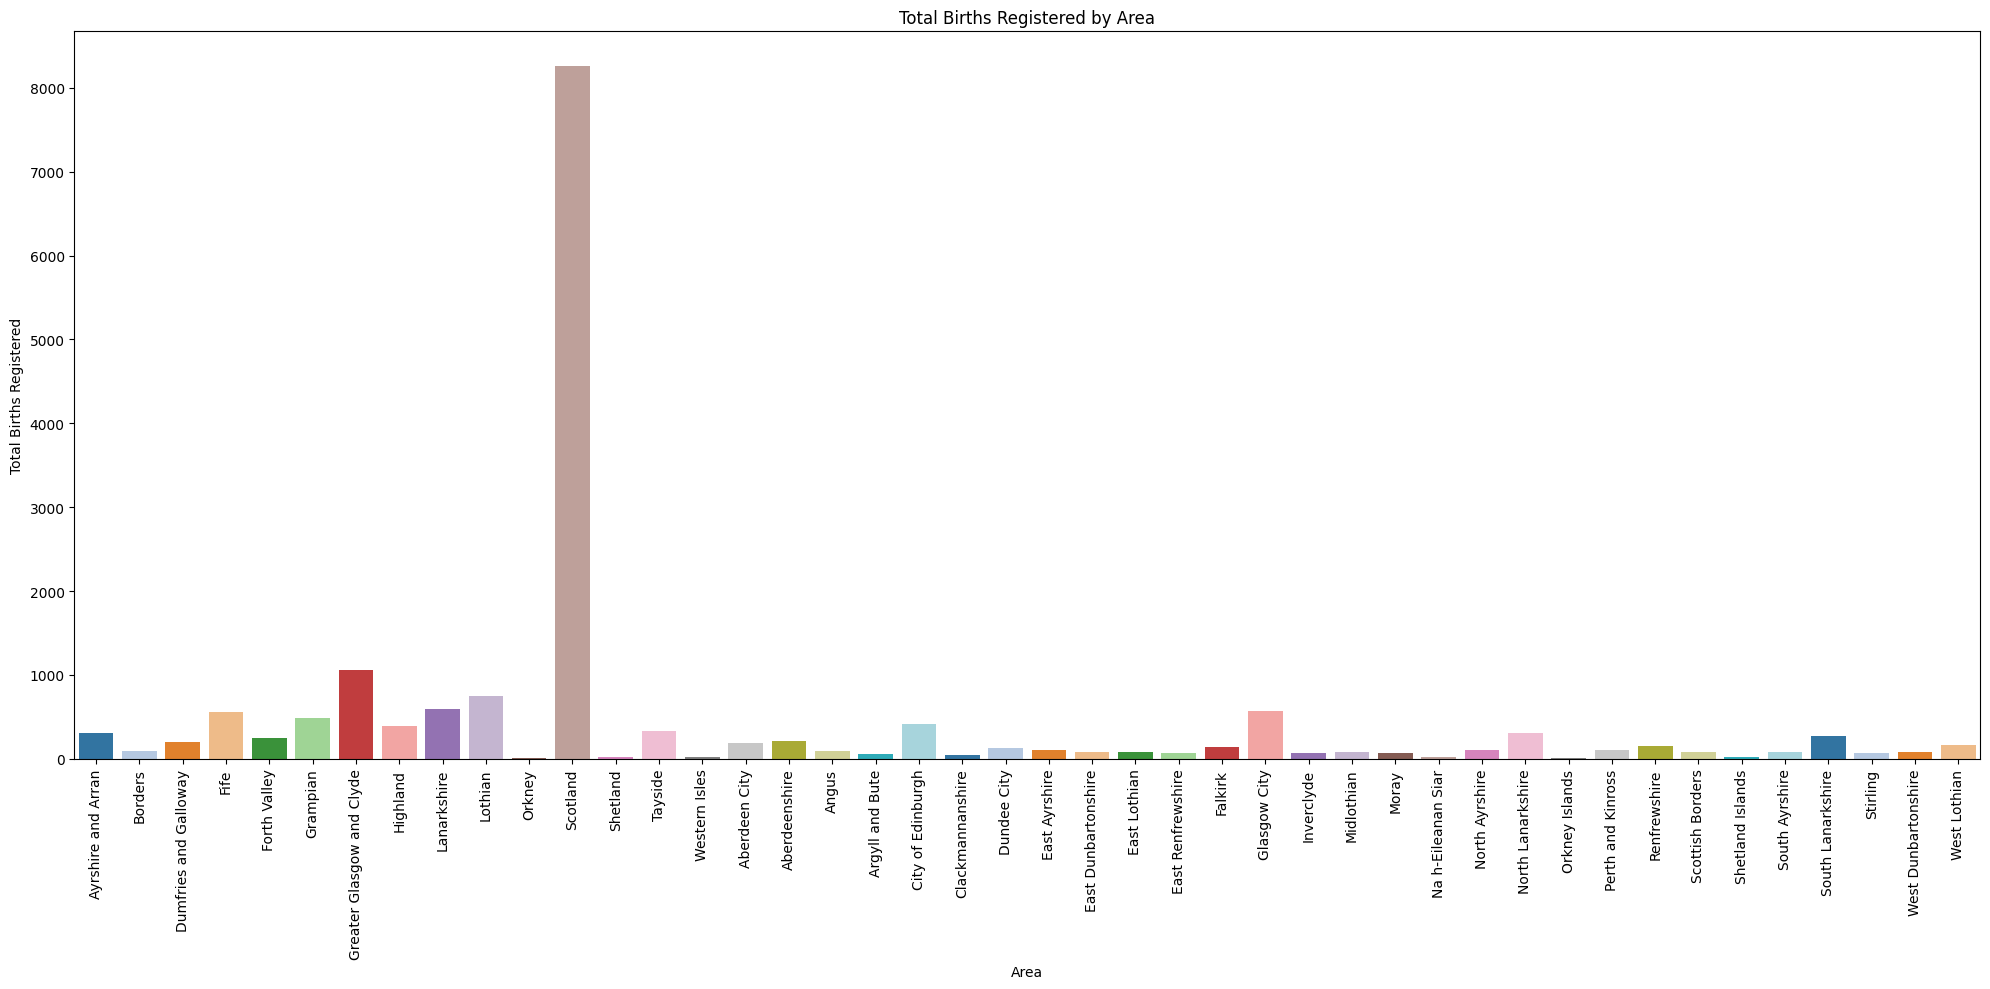

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x='register_by', y='Births registered total', data=data, ci=None, palette='tab20')
plt.title('Total Births Registered by Area')
plt.xlabel('Area')
plt.ylabel('Total Births Registered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
data_no_scotland = data[data['register_by'] != 'Scotland']
data_no_scotland.head()

,Year,Month,register_by,Births registered total
0,1991,August,Ayrshire and Arran,427.0
1,1991,August,Borders,100.0
2,1991,August,Dumfries and Galloway,163.0
3,1991,August,Fife,386.0
4,1991,August,Forth Valley,300.0


In [ ]:
data_no_scotland['Births registered total'].describe()

count    15366.000000
mean       218.780359
std        237.174171
min          1.000000
25%         68.000000
50%        113.000000
75%        303.000000
max       1895.000000
Name: Births registered total, dtype: float64

/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_56723/1980732114.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='register_by', y='Births registered total', data=data_no_scotland, ci=None, palette='tab20')
/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_56723/1980732114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='register_by', y='Births registered total', data=data_no_scotland, ci=None, palette='tab20')


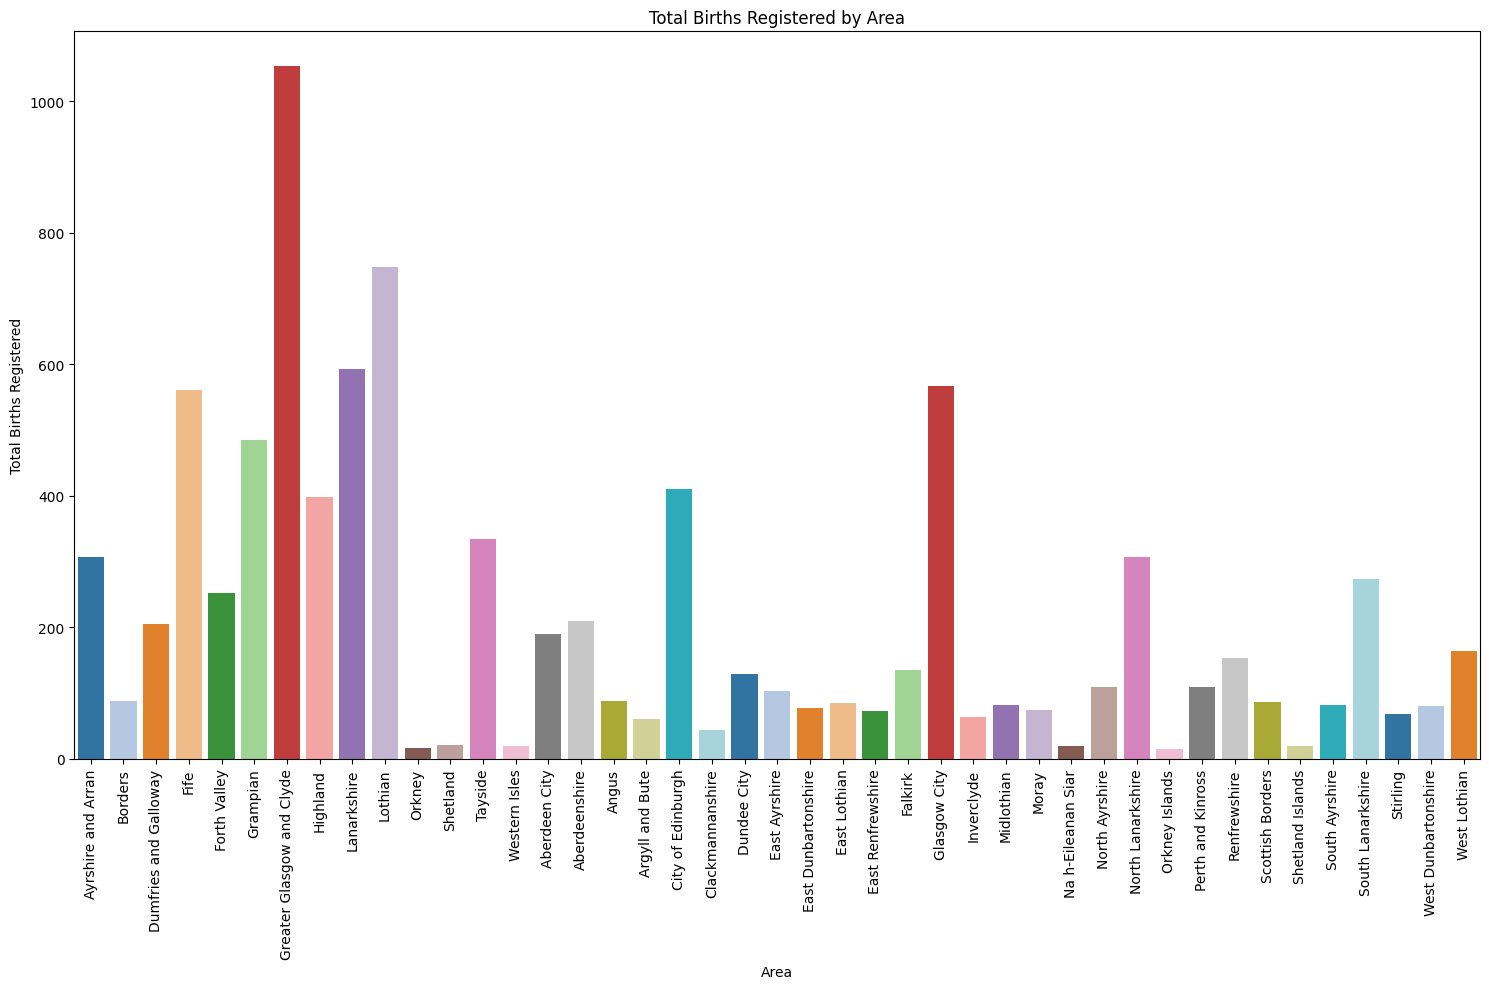

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='register_by', y='Births registered total', data=data_no_scotland, ci=None, palette='tab20')
plt.title('Total Births Registered by Area')
plt.xlabel('Area')
plt.ylabel('Total Births Registered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data_no_scotland['Births registered total'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Births Registered (Excluding Scotland)')
plt.xlabel('Total Births Registered')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()